## Import libraries

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Read the dataset

In [27]:
df = pd.read_csv('./inflationIndicatorsUpdates/InflationIndicators.csv')

## Info about the dataframe

In [28]:
df.head()

,year,month,day,USD_EUR_value,USD_EGP,EUR_EGP,cpi_rate,cpi_base_2010,RealInterestRate,InterestRate,XAU_Price,gdp_rate,UnemploymentRate,EUR/USD
0,1990,5,31,1,2.6892,NaN,NaN,19.147187,1.067535,NaN,NaN,5.667029,NaN,1.2117
1,1990,6,1,1,2.6892,NaN,NaN,19.147187,1.067535,NaN,NaN,5.667029,NaN,1.2096
2,1990,6,4,1,2.6967,NaN,NaN,19.147187,1.067535,NaN,NaN,5.667029,NaN,1.2167
3,1990,6,5,1,2.6967,NaN,NaN,19.147187,1.067535,NaN,NaN,5.667029,NaN,1.2188
4,1990,6,6,1,2.6967,NaN,NaN,19.147187,1.067535,NaN,NaN,5.667029,NaN,1.2170


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10023 entries, 0 to 10022
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              10023 non-null  int64  
 1   month             10023 non-null  int64  
 2   day               10023 non-null  int64  
 3   USD_EUR_value     10023 non-null  int64  
 4   USD_EGP           10023 non-null  float64
 5   EUR_EGP           7863 non-null   float64
 6   cpi_rate          8562 non-null   float64
 7   cpi_base_2010     10023 non-null  float64
 8   RealInterestRate  9704 non-null   float64
 9   InterestRate      5306 non-null   float64
 10  XAU_Price         1569 non-null   object 
 11  gdp_rate          9957 non-null   float64
 12  UnemploymentRate  9847 non-null   float64
 13  EUR/USD           1538 non-null   float64
dtypes: float64(9), int64(4), object(1)
memory usage: 1.1+ MB


In [30]:
# Convert 'XAU_Price' column to numeric (float)
df['XAU_Price'] = df['XAU_Price'].str.replace(',', '')

# Convert 'XAU_Price' column to numeric (float)
df['XAU_Price'] = pd.to_numeric(df['XAU_Price'], errors='coerce')

## Correlation 

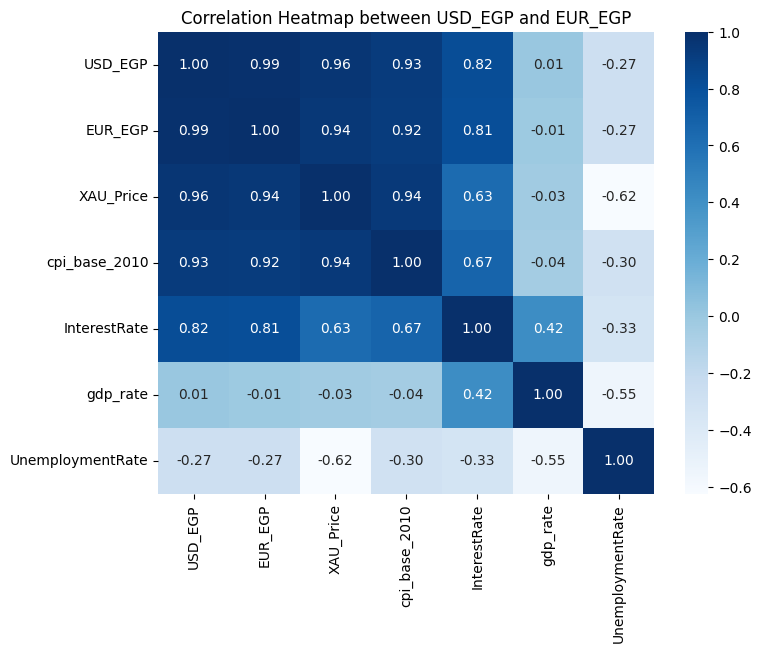

In [31]:
cor = df[['USD_EGP', 'EUR_EGP', 
          'XAU_Price', 'cpi_base_2010', 'InterestRate', 'gdp_rate', 'UnemploymentRate']].corr()
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cor, annot=True, cmap="Blues", fmt=".2f")
plt.title('Correlation Heatmap between USD_EGP and EUR_EGP')
plt.show()

## Impute missing value EUR_EGP column

In [32]:
def calculate_eur(row):
    if pd.isnull(row['EUR_EGP']):  # Check if 'eur' is null
        return row['USD_EGP'] / row['EUR/USD']
    else:
        return row['EUR_EGP']

df['EUR_EGP'] = df.apply(calculate_eur, axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10023 entries, 0 to 10022
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              10023 non-null  int64  
 1   month             10023 non-null  int64  
 2   day               10023 non-null  int64  
 3   USD_EUR_value     10023 non-null  int64  
 4   USD_EGP           10023 non-null  float64
 5   EUR_EGP           8410 non-null   float64
 6   cpi_rate          8562 non-null   float64
 7   cpi_base_2010     10023 non-null  float64
 8   RealInterestRate  9704 non-null   float64
 9   InterestRate      5306 non-null   float64
 10  XAU_Price         1569 non-null   float64
 11  gdp_rate          9957 non-null   float64
 12  UnemploymentRate  9847 non-null   float64
 13  EUR/USD           1538 non-null   float64
dtypes: float64(10), int64(4)
memory usage: 1.1 MB


In [33]:
# Function to impute missing values by taking the mean of the values from previous and next rows
def impute_missing(row):
    if pd.isnull(row['EUR_EGP']):
        if row.name - 1 >= 0:  # Check if the index is within the valid range
            if df.loc[row.name - 1, 'EUR_EGP'] == 0:
                previous_value = 0
            else:
                previous_value = df.loc[row.name - 1, 'EUR_EGP']
        else:
            previous_value = 0  # If the index is out of range, set previous_value to 0
        next_value = df.loc[row.name + 1, 'EUR_EGP'] if row.name + 1 < len(df) else None
        if pd.isnull(next_value) or next_value is None:
            imputed_value = (previous_value + previous_value) / 2
        else:
            imputed_value = (previous_value + next_value) / 2
        # Update the DataFrame immediately with the imputed value
        df.at[row.name, 'EUR_EGP'] = imputed_value
    else:
        return row['EUR_EGP']

# Apply the impute_missing function to fill missing values in the 'EUR_EGP' column
# _ = df.apply(impute_missing, axis=1)

df["EUR_EGP"]= df["EUR_EGP"].fillna(method='ffill', limit=1).fillna(method='bfill', limit=1)

print(df.info())

df.to_csv('./te.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10023 entries, 0 to 10022
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              10023 non-null  int64  
 1   month             10023 non-null  int64  
 2   day               10023 non-null  int64  
 3   USD_EUR_value     10023 non-null  int64  
 4   USD_EGP           10023 non-null  float64
 5   EUR_EGP           10022 non-null  float64
 6   cpi_rate          8562 non-null   float64
 7   cpi_base_2010     10023 non-null  float64
 8   RealInterestRate  9704 non-null   float64
 9   InterestRate      5306 non-null   float64
 10  XAU_Price         1569 non-null   float64
 11  gdp_rate          9957 non-null   float64
 12  UnemploymentRate  9847 non-null   float64
 13  EUR/USD           1538 non-null   float64
dtypes: float64(10), int64(4)
memory usage: 1.1 MB
None


C:\Users\Legion 5 Pro\AppData\Local\Temp\ipykernel_15132\4177462528.py:24: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["EUR_EGP"]= df["EUR_EGP"].fillna(method='ffill', limit=1).fillna(method='bfill', limit=1)


In [34]:
re = df[['USD_EGP', 'EUR_EGP', 
          'XAU_Price', 'cpi_base_2010', 'InterestRate', 'gdp_rate', 'UnemploymentRate']].corr()
re

,USD_EGP,EUR_EGP,XAU_Price,cpi_base_2010,InterestRate,gdp_rate,UnemploymentRate
USD_EGP,1.000000,0.990871,0.956667,0.929366,0.816401,0.005905,-0.271995
EUR_EGP,0.990871,1.000000,0.945170,0.915420,0.809578,0.001527,-0.237309
XAU_Price,0.956667,0.945170,1.000000,0.941138,0.625768,-0.031934,-0.624528
cpi_base_2010,0.929366,0.915420,0.941138,1.000000,0.671914,-0.044439,-0.298163
InterestRate,0.816401,0.809578,0.625768,0.671914,1.000000,0.417348,-0.327710
gdp_rate,0.005905,0.001527,-0.031934,-0.044439,0.417348,1.000000,-0.552531
UnemploymentRate,-0.271995,-0.237309,-0.624528,-0.298163,-0.327710,-0.552531,1.000000


In [50]:

df["XAU_Price"]= df["XAU_Price"].fillna(method='ffill', limit=1).fillna(method='bfill', limit=1)

C:\Users\Legion 5 Pro\AppData\Local\Temp\ipykernel_15132\2292323764.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["XAU_Price"]= df["XAU_Price"].fillna(method='ffill', limit=1).fillna(method='bfill', limit=1);


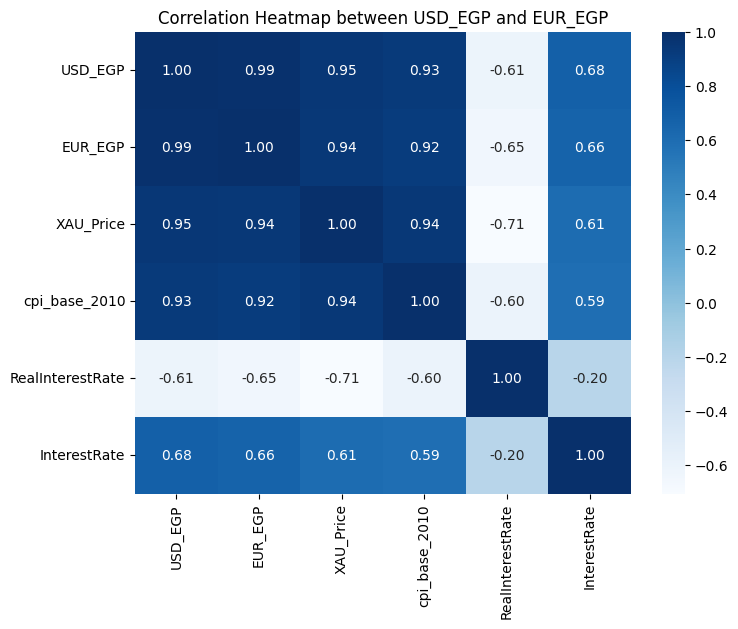

In [49]:
re = df[['USD_EGP', 'EUR_EGP', 
          'XAU_Price', 'cpi_base_2010', 'RealInterestRate','InterestRate']].corr()
re
plt.figure(figsize=(8, 6))
sns.heatmap(re, annot=True, cmap="Blues", fmt=".2f")
plt.title('Correlation Heatmap between USD_EGP and EUR_EGP')
plt.show()

## Impute missing values of cpi_rate

In [35]:
import pandas as pd

# Assuming df is your DataFrame containing cpi_rate and cpi_base_2010 columns

# Iterate backward from 1996 to 1990
for year in range(1996, 1989, -1):
    # Calculate CPI rate using the provided equation
    cpi_rate = df.loc[df['year'] == year + 1, 'cpi_rate'].values[0] * df.loc[df['year'] == year, 'cpi_base_2010'].values[0] / df.loc[df['year'] == year + 1, 'cpi_base_2010'].values[0]
    
    # Fill in the missing value in cpi_rate column
    df.loc[df['year'] == year, 'cpi_rate'] = cpi_rate

df.head()

,year,month,day,USD_EUR_value,USD_EGP,EUR_EGP,cpi_rate,cpi_base_2010,RealInterestRate,InterestRate,XAU_Price,gdp_rate,UnemploymentRate,EUR/USD
0,1990,5,31,1,2.6892,2.219361,1.982459,19.147187,1.067535,NaN,NaN,5.667029,NaN,1.2117
1,1990,6,1,1,2.6892,2.223214,1.982459,19.147187,1.067535,NaN,NaN,5.667029,NaN,1.2096
2,1990,6,4,1,2.6967,2.216405,1.982459,19.147187,1.067535,NaN,NaN,5.667029,NaN,1.2167
3,1990,6,5,1,2.6967,2.212586,1.982459,19.147187,1.067535,NaN,NaN,5.667029,NaN,1.2188
4,1990,6,6,1,2.6967,2.215859,1.982459,19.147187,1.067535,NaN,NaN,5.667029,NaN,1.2170


In [36]:
df.to_csv('./te.csv')

## Impute missing values in InterestRate

In [37]:
def calculate_interest_rate(real_interest_rate, cpi_rate):
    return real_interest_rate + cpi_rate  

df['InterestRate'] = df['InterestRate'].fillna(calculate_interest_rate(df['RealInterestRate'], df['cpi_rate']))


df.head()

,year,month,day,USD_EUR_value,USD_EGP,EUR_EGP,cpi_rate,cpi_base_2010,RealInterestRate,InterestRate,XAU_Price,gdp_rate,UnemploymentRate,EUR/USD
0,1990,5,31,1,2.6892,2.219361,1.982459,19.147187,1.067535,3.049994,NaN,5.667029,NaN,1.2117
1,1990,6,1,1,2.6892,2.223214,1.982459,19.147187,1.067535,3.049994,NaN,5.667029,NaN,1.2096
2,1990,6,4,1,2.6967,2.216405,1.982459,19.147187,1.067535,3.049994,NaN,5.667029,NaN,1.2167
3,1990,6,5,1,2.6967,2.212586,1.982459,19.147187,1.067535,3.049994,NaN,5.667029,NaN,1.2188
4,1990,6,6,1,2.6967,2.215859,1.982459,19.147187,1.067535,3.049994,NaN,5.667029,NaN,1.2170


In [38]:
df.to_csv('./te.csv')

## Impute missing values in RealInterestRate

In [39]:
def calculate_interest_rate(interest_rate, cpi_rate):
    return  cpi_rate - interest_rate 

df['RealInterestRate'] = df['RealInterestRate'].fillna(calculate_interest_rate(df['cpi_rate'], df['InterestRate']))

df.tail()

,year,month,day,USD_EUR_value,USD_EGP,EUR_EGP,cpi_rate,cpi_base_2010,RealInterestRate,InterestRate,XAU_Price,gdp_rate,UnemploymentRate,EUR/USD
10018,2024,3,21,1,46.9000,51.2148,33.066667,957.137145,-5.816667,27.25,102533.85,NaN,NaN,NaN
10019,2024,3,22,1,46.7500,50.6619,33.066667,957.137145,-5.816667,27.25,101756.42,NaN,NaN,NaN
10020,2024,3,25,1,46.7872,50.5648,33.066667,957.137145,-5.816667,27.25,100904.45,NaN,NaN,NaN
10021,2024,3,26,1,47.4040,50.5648,33.066667,957.137145,-5.816667,27.25,102952.66,NaN,NaN,NaN
10022,2024,3,27,1,47.8222,NaN,33.066667,957.137145,-5.816667,27.25,104194.83,NaN,NaN,NaN


In [40]:
df.to_csv('./te.csv')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10023 entries, 0 to 10022
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              10023 non-null  int64  
 1   month             10023 non-null  int64  
 2   day               10023 non-null  int64  
 3   USD_EUR_value     10023 non-null  int64  
 4   USD_EGP           10023 non-null  float64
 5   EUR_EGP           10022 non-null  float64
 6   cpi_rate          10023 non-null  float64
 7   cpi_base_2010     10023 non-null  float64
 8   RealInterestRate  10023 non-null  float64
 9   InterestRate      10023 non-null  float64
 10  XAU_Price         1569 non-null   float64
 11  gdp_rate          9957 non-null   float64
 12  UnemploymentRate  9847 non-null   float64
 13  EUR/USD           1538 non-null   float64
dtypes: float64(10), int64(4)
memory usage: 1.1 MB


In [42]:
re = df[['USD_EGP', 'EUR_EGP', 
          'XAU_Price', 'cpi_base_2010', 'RealInterestRate','InterestRate']].corr()
re

,USD_EGP,EUR_EGP,XAU_Price,cpi_base_2010,RealInterestRate,InterestRate
USD_EGP,1.000000,0.990871,0.956667,0.929366,-0.606548,0.682153
EUR_EGP,0.990871,1.000000,0.945170,0.915420,-0.645551,0.661195
XAU_Price,0.956667,0.945170,1.000000,0.941138,-0.721165,0.625768
cpi_base_2010,0.929366,0.915420,0.941138,1.000000,-0.602197,0.591447
RealInterestRate,-0.606548,-0.645551,-0.721165,-0.602197,1.000000,-0.204184
InterestRate,0.682153,0.661195,0.625768,0.591447,-0.204184,1.000000


In [43]:
df.fillna(df["XAU_Price"])

,year,month,day,USD_EUR_value,USD_EGP,EUR_EGP,cpi_rate,cpi_base_2010,RealInterestRate,InterestRate,XAU_Price,gdp_rate,UnemploymentRate,EUR/USD
0,1990,5,31,1,2.6892,2.219361,1.982459,19.147187,1.067535,3.049994,NaN,5.667029,NaN,1.2117
1,1990,6,1,1,2.6892,2.223214,1.982459,19.147187,1.067535,3.049994,NaN,5.667029,NaN,1.2096
2,1990,6,4,1,2.6967,2.216405,1.982459,19.147187,1.067535,3.049994,NaN,5.667029,NaN,1.2167
3,1990,6,5,1,2.6967,2.212586,1.982459,19.147187,1.067535,3.049994,NaN,5.667029,NaN,1.2188
4,1990,6,6,1,2.6967,2.215859,1.982459,19.147187,1.067535,3.049994,NaN,5.667029,NaN,1.2170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10018,2024,3,21,1,46.9000,51.214800,33.066667,957.137145,-5.816667,27.250000,102533.85,NaN,NaN,NaN
10019,2024,3,22,1,46.7500,50.661900,33.066667,957.137145,-5.816667,27.250000,101756.42,NaN,NaN,NaN
10020,2024,3,25,1,46.7872,50.564800,33.066667,957.137145,-5.816667,27.250000,100904.45,NaN,NaN,NaN
10021,2024,3,26,1,47.4040,50.564800,33.066667,957.137145,-5.816667,27.250000,102952.66,NaN,NaN,NaN


In [44]:
column_to_drop = 'EUR/USD'
df.drop(column_to_drop, axis=1, inplace=True)

In [45]:
column_to_drop = 'UnemploymentRate'
df.drop(column_to_drop, axis=1, inplace=True)


In [46]:
df.head()

,year,month,day,USD_EUR_value,USD_EGP,EUR_EGP,cpi_rate,cpi_base_2010,RealInterestRate,InterestRate,XAU_Price,gdp_rate
0,1990,5,31,1,2.6892,2.219361,1.982459,19.147187,1.067535,3.049994,NaN,5.667029
1,1990,6,1,1,2.6892,2.223214,1.982459,19.147187,1.067535,3.049994,NaN,5.667029
2,1990,6,4,1,2.6967,2.216405,1.982459,19.147187,1.067535,3.049994,NaN,5.667029
3,1990,6,5,1,2.6967,2.212586,1.982459,19.147187,1.067535,3.049994,NaN,5.667029
4,1990,6,6,1,2.6967,2.215859,1.982459,19.147187,1.067535,3.049994,NaN,5.667029


In [47]:
df.to_csv('./InflationIndicator_pro.csv', index=False)